In [1]:
try:
    import geomdl
    import shapely
    import pyDOE2
except:
    !pip3 install geomdl
    !pip3 install shapely
    !pip3 install pyDOE2

In [2]:
from geomdl import BSpline

# Create the curve instance
crv = BSpline.Curve()

# Set degree
crv.degree = 2

# Set control points
crv.ctrlpts = [[1, 0, 0], [1, 1, 0], [0, 1, 0]]

# Set knot vector
crv.knotvector = [0, 0, 0, 1, 1, 1]

In [3]:
from geomdl import NURBS
def curve_point_nurbs(control_pts=[[-0.7, 0.7, 0], [0, 0.7, 0], [0.7, 0.7, 0], [0.7, 0, 0], [0.7, -0.7, 0], [-0.7, 0, 0],[-0.7,-0.7,0],[-0.7,0,0],[-0.7, 0.7, 0]],knotvec= [0, 0,0,0.14285714,0.28571429,0.42857143,0.57142857,0.71428571,0.85714286,1, 1, 1],
                delta=0.003):
    # Create a 3-dimensional B-spline Curve
    curve = NURBS.Curve()

    # Set degree
    curve.degree = 2

    # Set control points (weights vector will be 1 by default)
    # Use curve.ctrlptsw is if you are using homogeneous points as Pw
    # let's vary each point in 1000 * 8
    # 6 CP
    # curve.ctrlpts =[[-0.7, 0.7, 0], [0, 0.7, 0], [0.7, 0.7, 0], [0.7, 0, 0], [0.7, -0.7, 0], [-0.7, 0, 0],[-0.7,-0.7,0],[-0.7,0,0],[-0.7, 0.7, 0]]
    curve.ctrlpts=control_pts
    # 9th control point is same as first control point 
    # let's vary the radius between 0.01 and 0.7 in magnitude and angle theta about -10 to 10 degrees and produce 
    # 60000 samples 
    # Set knot vector
    # this is fixed
    curve.knotvector = knotvec
    # setting this value such that it is not small
    # Set evaluation delta (controls the number of curve points)
    curve.delta = delta

    # Get curve points (the curve will be automatically evaluated)
    return curve.evalpts

In [7]:

import numpy as np
import matplotlib.pyplot as plt
from geomdl import BSpline
from pyDOE2 import lhs

# Original control points
original_ctrlpts = np.array([[-0.7, 0.7, 0], [0, 0.7, 0], [0.7, 0.7, 0], [0.7, 0, 0], [0.7, -0.7, 0],
                             [-0.7, 0, 0], [-0.7, -0.7, 0], [-0.7, 0, 0], [-0.7, 0.7, 0]])

# Number of control points
num_ctrlpts = len(original_ctrlpts)

# Number of samples
num_samples = 2000
np.random.seed(20)
# Generate Latin Hypercube Samples for radius and angle for each control point
samples = np.random.uniform(0, 1, size=(num_samples, 2,9))
# Make last and first element of every array same
samples[:, :, -1] = samples[:, :, 0]
# this is form radius
# print(samples[:,1])
# this is for degree

# Scale and shift samples for radius
radii = 0.01 + samples[:, 0] * (0.7 - 0.01)


# # Scale and shift samples for angle (convert to degrees)
angles_deg = -10 + samples[:, 1] * (10 - (-10))

# # Convert angles to radians
angles_rad = np.radians(angles_deg)
angles_rad
# # Create a B-spline curve
# curve = BSpline.Curve()

# # Set degree of the curve
curve.degree = 2
angles = np.radians([0,45,90,135,180,225,270,315,360])

# # Generate control points based on LHS samples
lhs_ctrlpts = np.zeros((num_samples,9,2))
# lhs_ctrlpts[:, :] = (radii * np.cos(angles_rad+angles),radii * np.sin(angles_rad+angles))
# (radii * np.cos(angles_rad+angles),radii * np.sin(angles_rad+angles))
lhs_ctrlpts[:,:,0]=radii * np.cos(angles_rad+angles)
lhs_ctrlpts[:,:,1]=radii * np.sin(angles_rad+angles)
# lhs_ctrlpts[:, :] = radii * np.sin(angles_rad+angles)

# Set control points for the first configuration
# curve.ctrlpts = lhs_ctrlpts[0]

# Generate the curve points
curve_points_lhs = curve_point_nurbs(lhs_ctrlpts[9])
curve_points_lhs
# Extract x, y coordinates from the curve points
x_coords = [point[0] for point in curve_points_lhs]
y_coords = [point[1] for point in curve_points_lhs]

# Plot the polygon
plt.plot(x_coords, y_coords, label="Polygon", linestyle="--", color="red")
plt.scatter(x_coords, y_coords, color="red")  # Optionally, plot polygon points
# plt.scatter(point[0], point[1], color="green")  # the point
plt.legend()
plt.show()
# # Plot the original curve
# plt.plot(curve_points_lhs[:, 0], curve_points_lhs[:, 1], 'bo', label='LHS Control Points')

# # Plot the original curve for comparison
# plt.plot(original_ctrlpts[:, 0], original_ctrlpts[:, 1], 'ro-', label='Original Curve')

# # Set axis limits
# plt.xlim([-1, 1])
# plt.ylim([-1, 1])

# # Set aspect ratio to be equal
# plt.gca().set_aspect('equal', adjustable='box')

# # Add legend
# plt.legend()

# # Show the plot
# plt.show()


NameError: name 'curve' is not defined

In [ ]:
# help function
import numpy as np

# Create an array with values from 0 to 1 with 6 equal increments
array_values = np.linspace(0, 1, 8)

print(array_values)


In [ ]:
# 
import numpy as np

def signed_distance_polygon(point, polygon_vertices):
    """
    Calculate the signed distance from a point to a convex polygon.

    Parameters:
    - point: NumPy array of shape (2,) representing the point
    - polygon_vertices: NumPy array of shape (num_vertices, 2) representing the vertices of the convex polygon

    Returns:
    - Signed distance from the point to the polygon
    """
    num_vertices = polygon_vertices.shape[0]

    # Initialize variables
    d = np.inf
    s = 1.0

    for i in range(num_vertices):
        j = (i - 1) % num_vertices
        e = polygon_vertices[j] - polygon_vertices[i]
        w = point - polygon_vertices[i]

        # Calculate the perpendicular distance
        b = w - e * np.clip(np.dot(w, e) / np.dot(e, e), 0.0, 1.0)
        d = min(d, np.linalg.norm(b))

        # Determine the sign based on winding number
        if (polygon_vertices[i, 1] <= point[1] < polygon_vertices[j, 1]) or (polygon_vertices[j, 1] <= point[1] < polygon_vertices[i, 1]):
            if polygon_vertices[i, 1] <= point[1] < polygon_vertices[j, 1]:
                if e[0] * w[1] > e[1] * w[0]:
                    s = -s
            elif polygon_vertices[j, 1] <= point[1] < polygon_vertices[i, 1]:
                if e[0] * w[1] < e[1] * w[0]:
                    s = -s

    return s * d



# Example usage:
# Convert to 2D points and arrange in the acceptable form
polygon_vertices = np.array([(x, y) for x, y, _ in curve_points])
point = np.array([0.1, 0.721])

signed_distance = signed_distance_polygon(point, polygon_vertices)
print("Signed distance for the point:", signed_distance)

# Extract x, y coordinates from the curve points
x_coords = [point[0] for point in curve_points]
y_coords = [point[1] for point in curve_points]

# Plot the polygon
plt.plot(x_coords, y_coords, label="Polygon", linestyle="--", color="red")
plt.scatter(x_coords, y_coords, color="red")  # Optionally, plot polygon points
plt.scatter(point[0], point[1], color="green")  # the point
plt.legend()
plt.show()

In [ ]:
from concurrent.futures import ProcessPoolExecutor
def calculate_signed_distances_parallel(points, polygon_vertices):
    with ProcessPoolExecutor() as executor:
        # Use executor.map to parallelize the signed_distance_polygon function
        signed_distances = list(executor.map(signed_distance_polygon, points, [polygon_vertices]*len(points)))

    return np.array(signed_distances).reshape(256,256)

In [ ]:
# this works 
# Convert to 2D points and arrange in the acceptable form
import time
polygon_vertices = np.array([x, y) for x, y in curve_points_lhs],dtype=np.float32)

# Create a 256x256 grid
x = np.linspace(-1, 1, 256)
y = np.linspace(-1, 1, 256)
xx, yy = np.meshgrid(x, y)
grid_points = np.column_stack((xx.flatten(), yy.flatten()))

faces = []
# Compute signed distances for the grid points
signed_distances = np.zeros_like(grid_points[:, 0])
start_time = time.time()
# signed_distances = calculate_signed_distances_parallel(polygon_vertices,grid_points)
# retval = cv.pointPolygonTest(contour, pt, True)
for i in range(grid_points.shape[0]):
    point = grid_points[i]
    signed_distance = cv.pointPolygonTest(polygon_vertices, point, True)
    signed_distances[i] = signed_distance
end_time = time.time()
print(start_time-end_time)
# Reshape the signed distances into a 256x256 grid
signed_distances_grid = signed_distances.reshape(256, 256)

# Visualize the results
plt.imshow(signed_distances_grid, cmap='viridis', extent=(-1, 1, -1, 1))
plt.colorbar()
plt.title('Signed Distances to Polygon')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [ ]:
# Visualize the results with signed distances between -0.1 and 0.1
plt.imshow(signed_distances_grid, cmap='viridis', extent=(-1, 1, -1, 1))
plt.colorbar()

# Highlight points with signed distances between -0.1 and 0.1
highlighted_points = grid_points[(signed_distances > -0.003) & (signed_distances < 0.003)]
plt.scatter(highlighted_points[:, 0], highlighted_points[:, 1], c='red', marker='.', label='Points in [-0.003, 0.003]')

plt.title('Signed Distances to Polygon with Highlighted Points')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [ ]:
import cv2 as cv
curve_points_lhs = curve_point_nurbs(lhs_ctrlpts[9])
curve_points_lhs
# Create a simple square contour
contour = np.array(curve_points_lhs, dtype=np.float32)

# Point to test
pt = [(0.5, 0.5)]

# Use pointPolygonTest
retval = cv.pointPolygonTest(contour, pt, True)
retval

In [6]:
import time
import numpy as np
# convert a 2D polygon to a mesh and use libgl to compute signed distance for faster impelmentation
polygon = curve_point_nurbs()
# convert to vertices as last one is repeated
vertices = polygon[:-1]
# let's take a point 0,0,10 and create triangle soup 
vertices.append([0,0,10])

add_faces = [[0,i,i+1] for i in range(len(vertices)-2) ]
faces = [[i,i+1,len(vertices)-1] for i in range(len(vertices)-2) ]

# face to close the polygon
# faces.append[[0,i,i+1] for i in range(len(vertices)-2) ]
faces.append([0,len(vertices)-2,len(vertices)-1])
faces=faces+add_faces
# faces
# last_val
# vertices
# new
# faces
import trimesh 
mesh = trimesh.Trimesh(vertices=vertices, faces=faces)
# # mesh.export(os.path.join(save_directory, f"output_mesh{i}.stl"), file_type='stl')
# print(f"Saving mesh to {os.path.join(save_directory, f'{os.path.basename(geometry_path)}_resconstructed_{recon_size}.stl')}")
# mesh.export(os.path.join(save_directory, f"{os.path.basename(geometry_path)}_resconstructed_{recon_size}.stl"), file_type='stl') 
# else:
mesh.export("test_file.stl")
query_points=np.array([[0, 0, 0]], dtype=np.float32)
import igl
# S_in, _, _ = igl.signed_distance(query_points, np.array(vertices), np.array(faces), return_normals=False)
# S_in
# Create a 256x256 grid
x = np.linspace(-1, 1, 256)
y = np.linspace(-1, 1, 256)
xx, yy = np.meshgrid(x, y)
zz = np.zeros_like(xx)
grid_points = np.column_stack((xx.flatten(), yy.flatten(),zz.flatten()))

# Compute signed distances for the grid points
signed_distances = np.zeros_like(grid_points[:, 0])
start_time = time.time()
S_in, _, _ = igl.signed_distance(grid_points, np.array(vertices), np.array(faces), return_normals=False)

end_time = time.time()

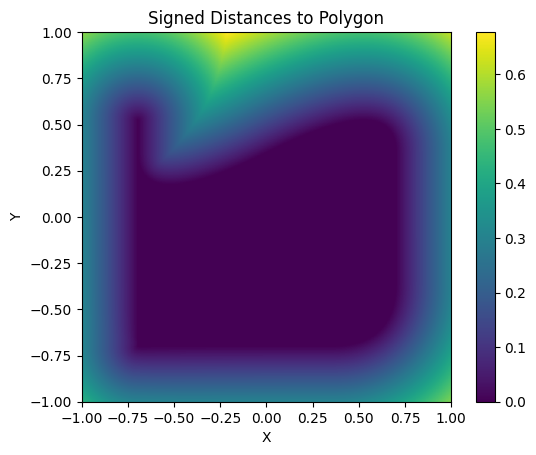

In [15]:
signed_distances_grid = S_in.reshape(256, 256)

# Visualize the results
plt.imshow(signed_distances_grid, cmap='viridis', extent=(-1, 1, -1, 1))
plt.colorbar()
plt.title('Signed Distances to Polygon')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [ ]:
# Visualize the results with signed distances between -0.1 and 0.1
plt.imshow(signed_distances_grid, cmap='viridis', extent=(-1, 1, -1, 1))
plt.colorbar()

# Highlight points with signed distances between -0.1 and 0.1
highlighted_points = grid_points[(signed_distances > -0.003) & (signed_distances < 0.003)]
plt.scatter(highlighted_points[:, 0], highlighted_points[:, 1], c='red', marker='.', label='Points in [-0.003, 0.003]')

plt.title('Signed Distances to Polygon with Highlighted Points')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [ ]:
def is_ear(p1, p2, p3, polygon):
    # Check if the triangle formed by p1, p2, p3 is an "ear" in the polygon
    for vertex in polygon:
        if vertex not in [p1, p2, p3]:
            if is_point_inside_triangle(p1, p2, p3, vertex):
                return False
    return True

def is_point_inside_triangle(p1, p2, p3, test_point):
    # Check if test_point is inside the triangle formed by p1, p2, p3
    detT = (p2[1] - p3[1]) * (p1[0] - p3[0]) + (p3[0] - p2[0]) * (p1[1] - p3[1])
    alpha = ((p2[1] - p3[1]) * (test_point[0] - p3[0]) + (p3[0] - p2[0]) * (test_point[1] - p3[1])) / detT
    beta = ((p3[1] - p1[1]) * (test_point[0] - p3[0]) + (p1[0] - p3[0]) * (test_point[1] - p3[1])) / detT
    gamma = 1 - alpha - beta

    return 0 <= alpha <= 1 and 0 <= beta <= 1 and 0 <= gamma <= 1

def ear_clip_triangulation(polygon):
    triangles = []

    while len(polygon) >= 3:
        for i in range(len(polygon)):
            p1, p2, p3 = polygon[i - 1], polygon[i], polygon[(i + 1) % len(polygon)]
            if is_ear(p1, p2, p3, polygon):
                triangles.append([p1, p2, p3])
                polygon.pop(i)
                break

    return triangles

# Example usage:
polygon_vertices = polygon
resulting_triangles = ear_clip_triangulation(polygon_vertices)
print(resulting_triangles)



In [ ]:
import time
import numpy as np
polygon = curve_point_nurbs()
polygon_vertices = np.array(polygon)
# polygon_vertices=np.append(polygon_vertices,[0,0,0])
# Create a 256x256 grid

x = np.linspace(-1, 1, 256)
y = np.linspace(-1, 1, 256)
xx, yy = np.meshgrid(x, y)
zz = np.zeros_like(xx)
grid_points = np.column_stack((xx.flatten(), yy.flatten(),zz.flatten()))

# Compute signed distances for the grid points
# signed_distances = np.zeros_like(grid_points[:, 0])

S_in, _, _ = igl.signed_distance(grid_points, np.array(polygon_vertices), np.array(faces), return_normals=False)

In [11]:
S_in

array(0., dtype=float32)